# 2043. Simple Bank System

<br/>

📎 문제 출처: https://leetcode.com/problems/simple-bank-system/

> You have been tasked with writing a program for a popular bank that will automate all its incoming transactions (transfer, deposit, and withdraw). The bank has n accounts numbered from 1 to n. The initial balance of each account is stored in a 0-indexed integer array balance, with the (i + 1)th account having an initial balance of balance[i]. <br/><br/>
Execute all the valid transactions. A transaction is valid if:<br/><br/>
The given account number(s) are between 1 and n, and
The amount of money withdrawn or transferred from is less than or equal to the balance of the account.
Implement the Bank class:<br/><br/>
Bank(long[] balance) Initializes the object with the 0-indexed integer array balance.<br/><br/>
boolean transfer(int account1, int account2, long money) Transfers money dollars from the account numbered account1 to the account numbered account2. Return true if the transaction was successful, false otherwise.
boolean deposit(int account, long money) Deposit money dollars into the account numbered account. Return true if the transaction was successful, false otherwise.<br/><br/>
boolean withdraw(int account, long money) Withdraw money dollars from the account numbered account. Return true if the transaction was successful, false otherwise.

In [1]:
class Bank(object):

    def __init__(self, balance):
        """
        :type balance: List[int]
        """
        

    def transfer(self, account1, account2, money):
        """
        :type account1: int
        :type account2: int
        :type money: int
        :rtype: bool
        """
        

    def deposit(self, account, money):
        """
        :type account: int
        :type money: int
        :rtype: bool
        """
        

    def withdraw(self, account, money):
        """
        :type account: int
        :type money: int
        :rtype: bool
        """
        


# Your Bank object will be instantiated and called as such:
# obj = Bank(balance)
# param_1 = obj.transfer(account1,account2,money)
# param_2 = obj.deposit(account,money)
# param_3 = obj.withdraw(account,money)

### 문제 해석
은행은 `n`개(1-n)의 계좌를 가짐. 각 계좌의 초기 balance는 `balance` 배열의 `(i+1)th` 번째 계좌인 `balance[i]`에 **0-indexed** integer로 저장되어 있다. <br/>

**valid transactions** <br/>
- 주어진 계좌 번호는 `1`~`n` 사이
- withdrawn / transferred된 돈은 계좌 잔액보다 작거나 동일함

`Bank` class 구현하기
- `Bank(long[] balance)`: **0-indexed** integer array인 `balance` 배열 초기화
- `boolean transfer(int account1, int account2, long money)`: `account1`에서 `account2`로 `money`를 보냄. 송금에 성공하면 `true` 반환, otherwise `false` 반환
- `boolean deposit(int account, long money)`: `account` 계좌에 `money` 예금. 성공하면 `true`, otherwise `false` 반환
- `boolean withdraw(int account, long money)`: `account` 계좌에서 `money` 출금. 성공하면 `true`, otherwise `false` 반환 

### 1st-try

In [7]:
class Bank(object):

    def __init__(self, balance):
        self.balance = balance

    def transfer(self, account1, account2, money):
        if self.balance[account1-1]>= money:
            self.balance[account1-1] -= money
            self.balance[account2-1] += money
            return True
        else: return False

    def deposit(self, account, money): # 얘가 돌아가지 않을 경우는?
        if money >= 0:
            self.balance[account-1] += money
            return True
        else: return False


    def withdraw(self, account, money):
        if self.balance[account-1] >= money:
            self.balance[account-1] -= money
            return True
        else: return False


# Your Bank object will be instantiated and called as such:
# obj = Bank(balance)
# param_1 = obj.transfer(account1,account2,money)
# param_2 = obj.deposit(account,money)
# param_3 = obj.withdraw(account,money)

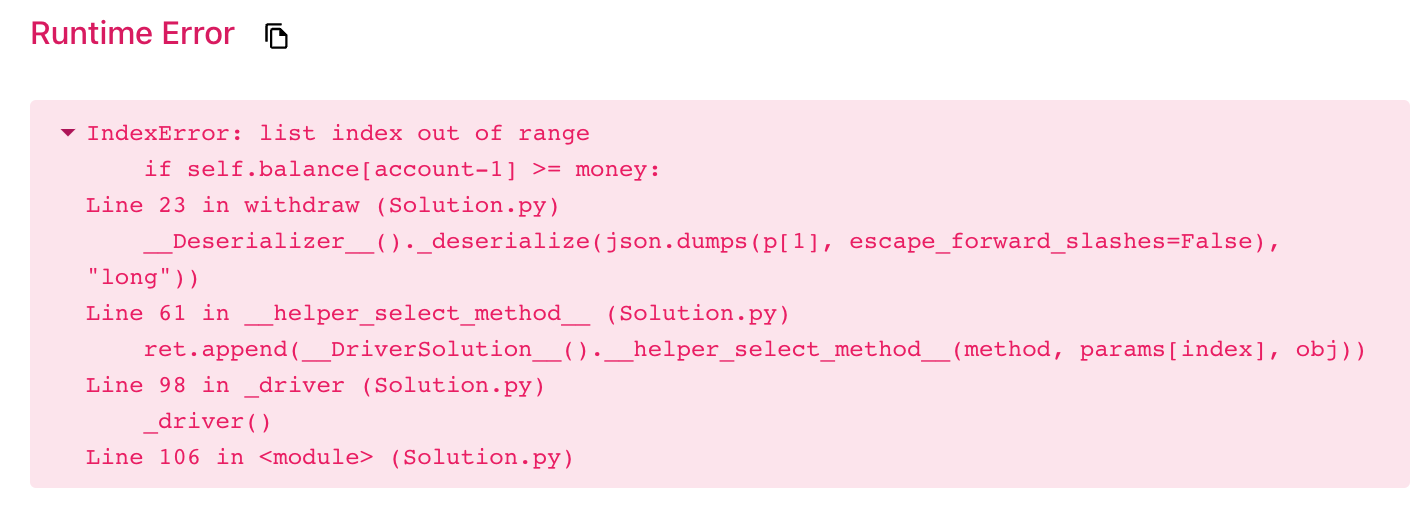

- `The given account number(s) are between 1 and n` 조건을 고려하지 않음!
- index error?

### 2nd-try

In [ ]:
class Bank(object):

    def __init__(self, balance):
        self.balance = balance
        self.n = len(self.balance)

    def transfer(self, account1, account2, money):
        if (self.balance[account1-1]>= money) and (account1 <= self.n):
            self.balance[account1-1] -= money
            self.balance[account2-1] += money
            return True
        else: return False

    def deposit(self, account, money): # 얘가 돌아가지 않을 경우는?
        if (money >= 0) and (account <= self.n):
            self.balance[account-1] += money
            return True
        else: return False

    def withdraw(self, account, money):
        if (account <= self.n) and (self.balance[account-1] >= money):
            self.balance[account-1] -= money
            return True
        else: return False

# Your Bank object will be instantiated and called as such:
# obj = Bank(balance)
# param_1 = obj.transfer(account1,account2,money)
# param_2 = obj.deposit(account,money)
# param_3 = obj.withdraw(account,money)

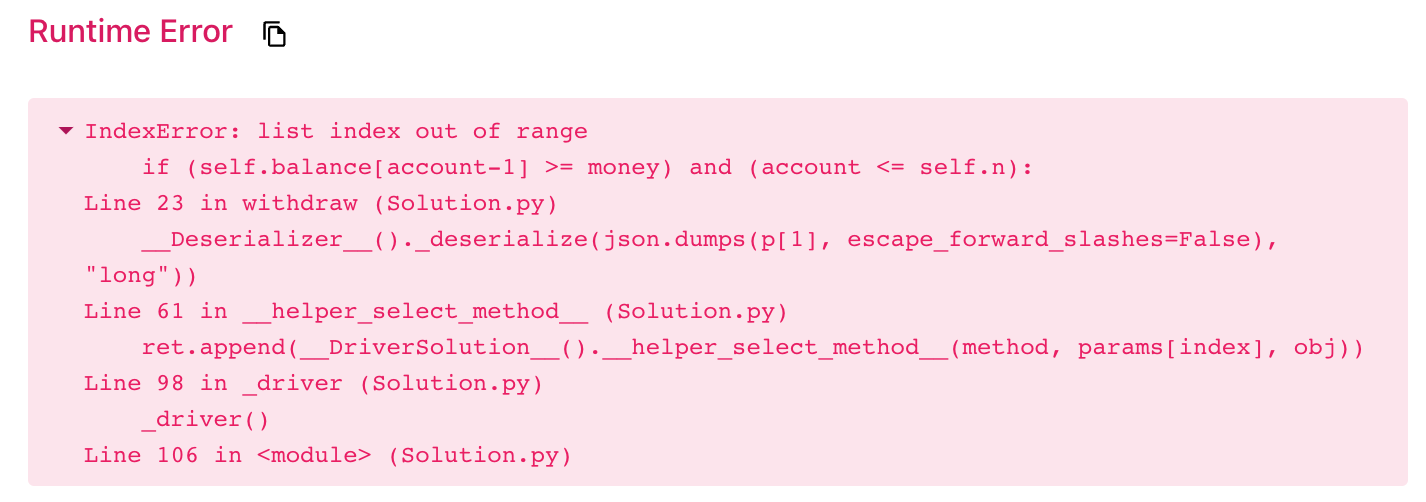

- 여전히 index error!

### 3rd-try
- index error 이유 찾았다!!! python은 인터프리터 언어이므로 위에서 아래로 수행하는 것까진 알았는데, 같은 if문 안에서 and 조건문이 있을 경우 앞의 조건부터 고려한다는 걸 인지하지 못했었음 .........
- 따라서 계속 에러 나는 `withdraw` 함수 안을 살펴보면 `self.balance[account-1] >= money`에서 account가 balance에 없는 경우 애초에 index error가 발생하기 때문에 `(account <= self.n)` 조건을 고려해주더라도 에러가 떴었던 것!
- 두 조건의 자리를 바꾸면 말끔히 해결 ~~~ account가 False이면 and 뒤의 조건을 보지 않더라도 False이기 때문에 account가 balance에 없더라도 에러 없이 실행이 잘 될 것이다.

In [ ]:
class Bank(object):

    def __init__(self, balance):
        self.balance = balance
        self.n = len(self.balance)

    def transfer(self, account1, account2, money):
        if (self.balance[account1-1]>= money) and (account1 <= self.n):
            self.balance[account1-1] -= money
            self.balance[account2-1] += money
            return True
        else: return False

    def deposit(self, account, money): # 얘가 돌아가지 않을 경우는?
        if (money >= 0) and (account <= self.n):
            self.balance[account-1] += money
            return True
        else: return False

    def withdraw(self, account, money):
        if (self.balance[account-1] >= money) and (account <= self.n):
            self.balance[account-1] -= money
            return True
        else: return False
        


# Your Bank object will be instantiated and called as such:
# obj = Bank(balance)
# param_1 = obj.transfer(account1,account2,money)
# param_2 = obj.deposit(account,money)
# param_3 = obj.withdraw(account,money)

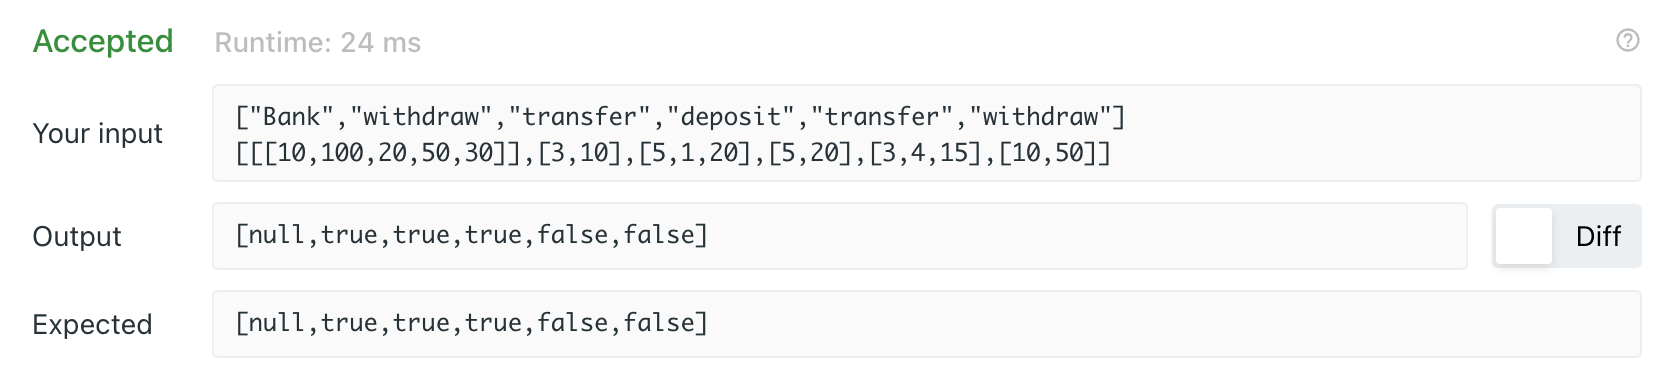

- but, 실행은 되는데 Submit에서 오류가 떴음! 캡쳐는 못했다.

### 🔆 4th-try
- transfer을 할 경우 나는 account1의 계좌 당위성만 확인했는데, 돈을 받는 account2도 고려를 해야한다.. why? 없는 계좌에 보내면 안 되기 때문~
- 여기서도 마찬가지로 account1, account2의 계좌 조건부터 확인해주는 거 명심하자

In [ ]:
class Bank(object):

    def __init__(self, balance):
        self.balance = balance
        self.n = len(self.balance)

    def transfer(self, account1, account2, money):
        if (1 <= account1 <= self.n) and (1 <= account2 <= self.n) and (self.balance[account1-1] >= money):
            self.balance[account1-1] -= money
            self.balance[account2-1] += money
            return True
        return False

    def deposit(self, account, money): # 얘가 돌아가지 않을 경우는?
        if (money >= 0) and (1 <= account <= self.n):
            self.balance[account-1] += money
            return True
        return False

    def withdraw(self, account, money):
        if (1 <= account <= self.n) and (self.balance[account-1] >= money):
            self.balance[account-1] -= money
            return True
        return False


# Your Bank object will be instantiated and called as such:
# obj = Bank(balance)
# param_1 = obj.transfer(account1,account2,money)
# param_2 = obj.deposit(account,money)
# param_3 = obj.withdraw(account,money)

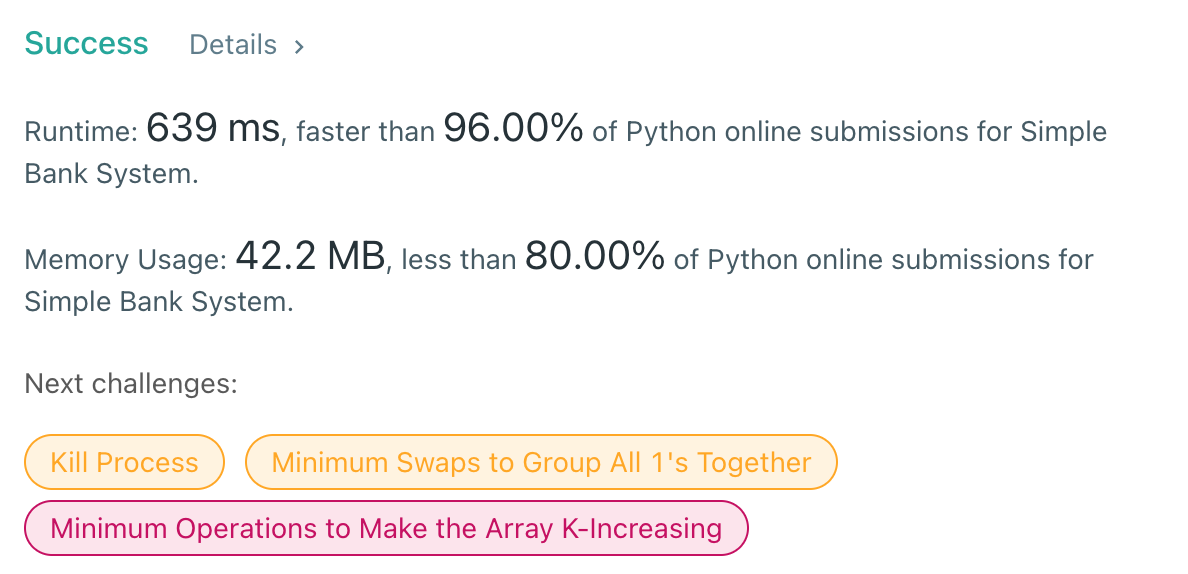

***
#### 🤗 추가로 기억할 것 ,,,
`return`으로 반환을 하면 해당 함수를 종료시켜준다! 따라서 굳이 `else: `문을 쓰지 않더라도 `return True`를 실행하면 `return False`는 실행 안 하고 끝남.. 기억해

In [20]:
a = 3

def www(a):
    if a==3:
        return True
    
    return False

In [21]:
www(3)

True